In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Loading the dataset
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'
validation_path = '../dataset_organized/validation/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)
X_val, y_val = load_images(validation_path)

# Checking the shape of the dataset
print()
print("Shape of the training set: ", X_train.shape)
print("Shape of the testing set: ", X_test.shape)
print("Shape of the validation set: ", X_val.shape)
print("Number of images in the training set: ", X_train.shape[0])
print("Number of images in the testing set: ", X_test.shape[0])
print("Number of images in the validation set: ", X_val.shape[0])

100%|██████████| 17/17 [00:00<00:00, 1818.96it/s]


Shape of the training set:  (1768, 150, 150, 3)
Shape of the testing set:  (431, 150, 150, 3)
Shape of the validation set:  (328, 150, 150, 3)
Number of images in the training set:  1768
Number of images in the testing set:  431
Number of images in the validation set:  328


In [19]:
classes_names = np.unique(y_train)

print(classes_names)

['cardboard' 'glass' 'metal' 'paper' 'plastic' 'trash']


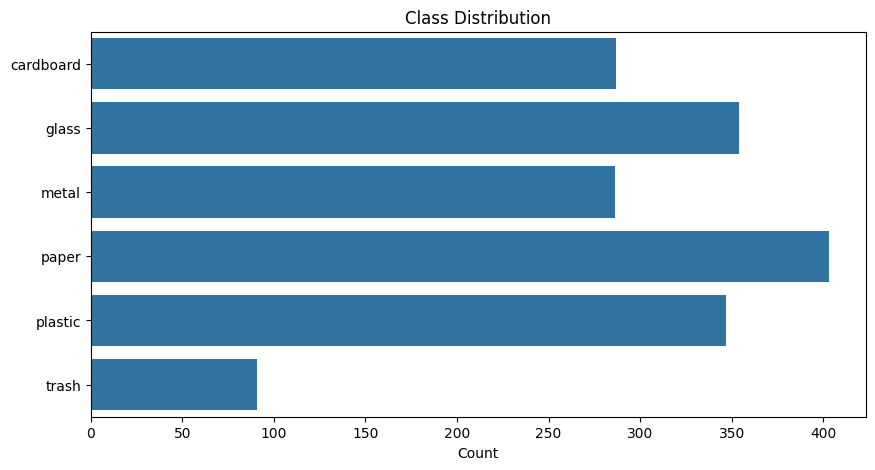

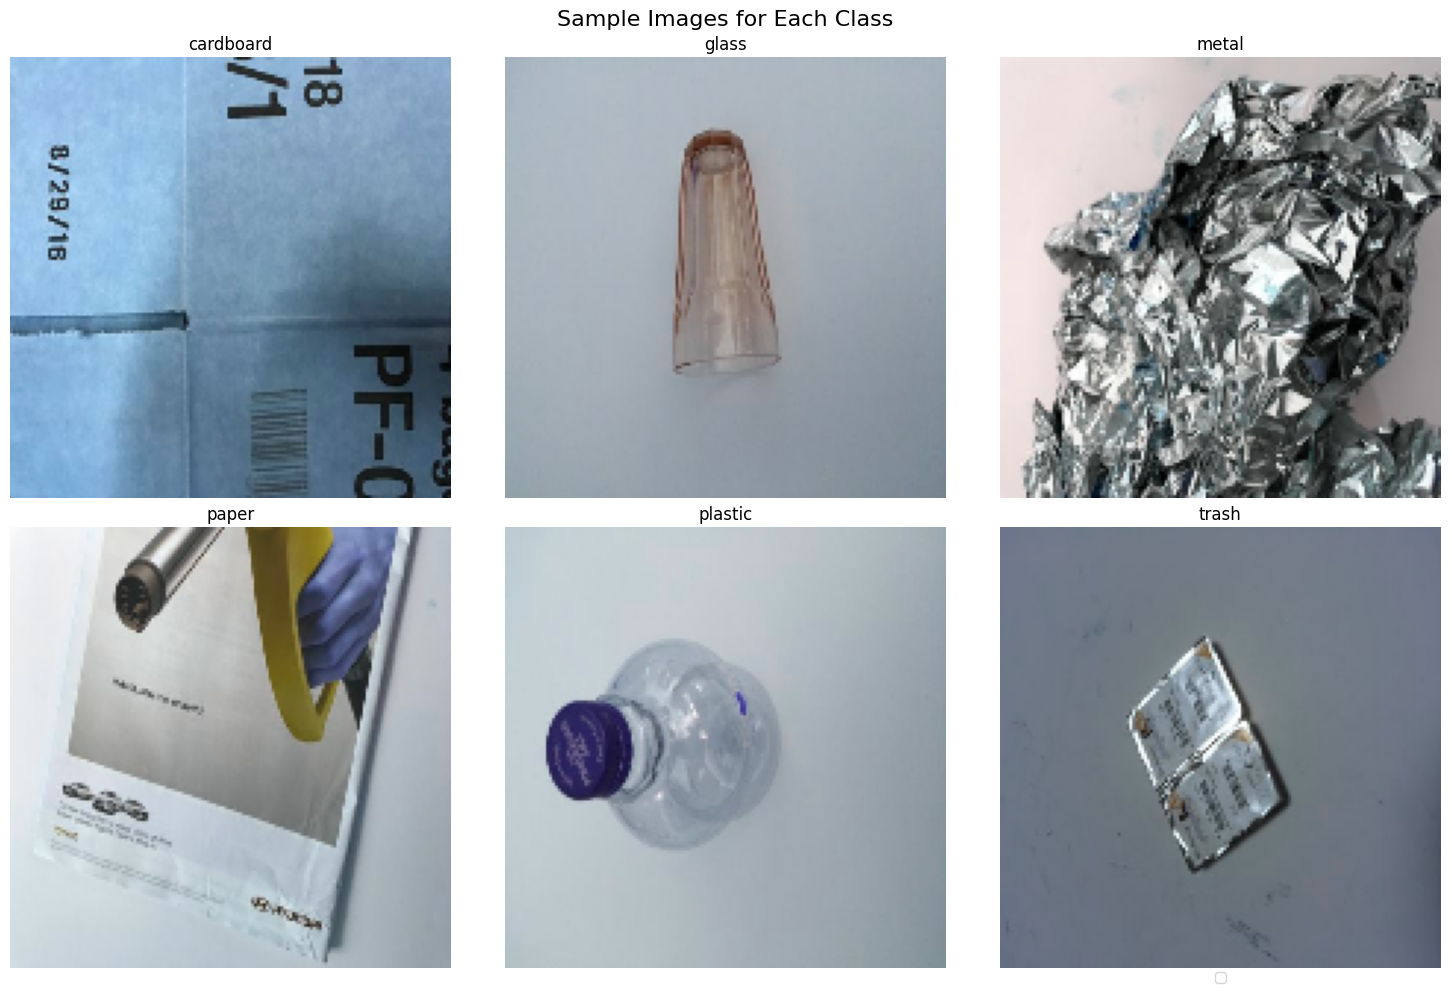

In [20]:
# Plotting the class distribution with a legend
plt.figure(figsize=(10, 5))
sns.countplot(y_train)
plt.title('Class Distribution')
plt.xlabel('Count')
plt.show()

# Plotting sample images for each class with a legend
plt.figure(figsize=(15, 10))
printed = []

for class_name in classes_names:
    for i in range(len(y_train)):
        if y_train[i] == class_name and class_name not in printed:
            plt.subplot(2, 3, len(printed) + 1)
            plt.imshow(X_train[i])
            plt.title(class_name)
            plt.axis('off')
            printed.append(class_name)
            break

plt.suptitle('Sample Images for Each Class', fontsize=16)
plt.legend(['Sample Images'], loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.tight_layout()
plt.show()

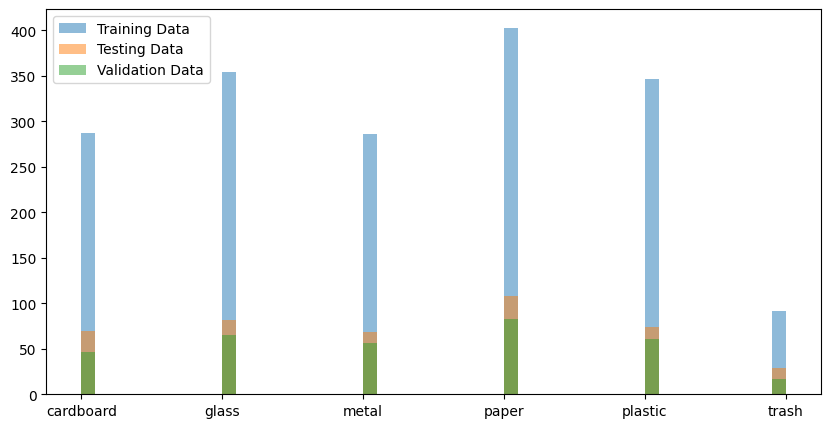

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(y_train, alpha=0.5, bins=50, label='Training Data')
plt.hist(y_test, alpha=0.5, bins=50,  label='Testing Data')
plt.hist(y_val, alpha=0.5, bins=50, label='Validation Data')
plt.legend()
plt.show()

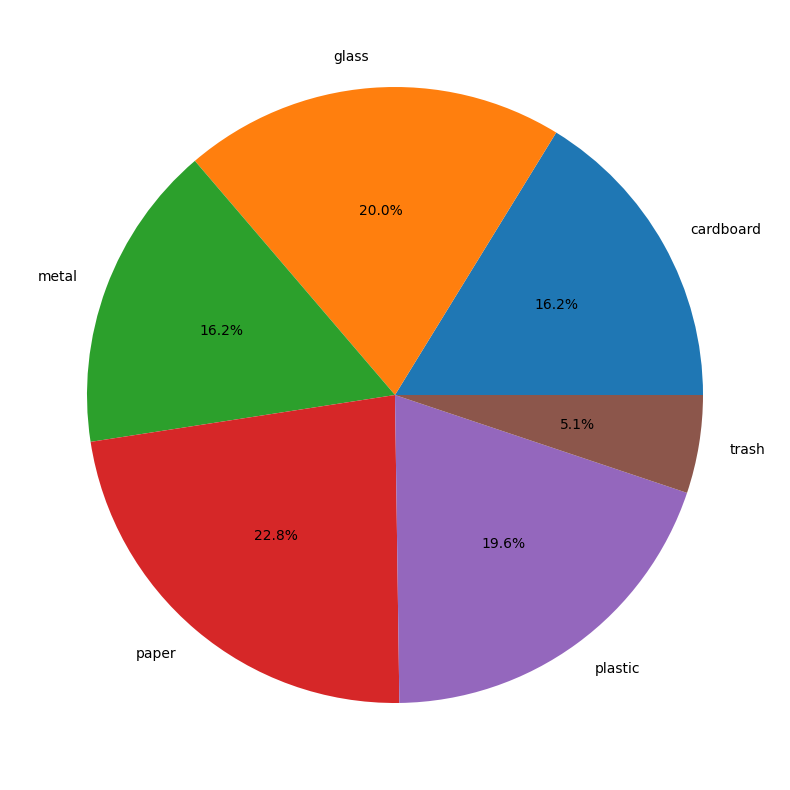

In [22]:
plt.figure(figsize=(10, 10))
plt.pie([len(y_train[y_train == class_name]) for class_name in classes_names], labels=classes_names, autopct='%1.1f%%')
plt.show()

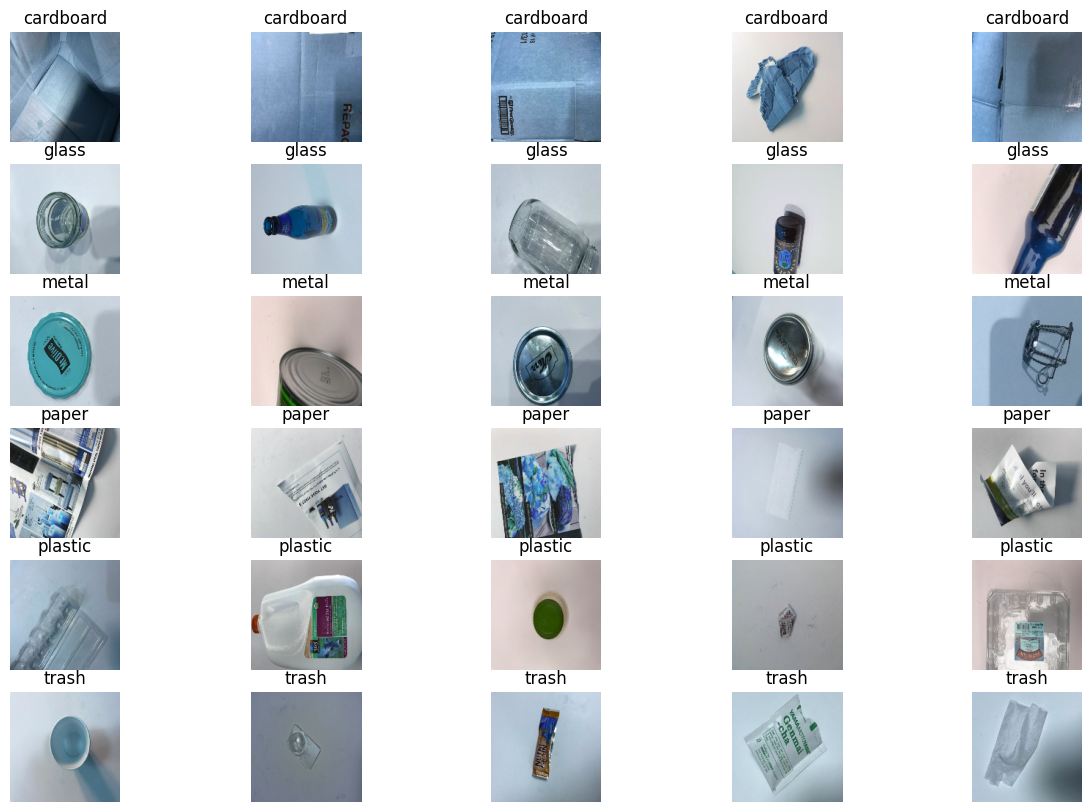

In [23]:
def display_random_images(X, y, classes_names, number_of_images=5):
    plt.figure(figsize=(15, 10))

    for class_name in classes_names:
        for i in range(number_of_images):
            plt.subplot(len(classes_names), number_of_images, number_of_images * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[y == class_name][np.random.randint(0, len(X[y == class_name]))])
            plt.title(class_name)
            plt.axis('off')
    
    plt.show()

display_random_images(X_train, y_train, classes_names)

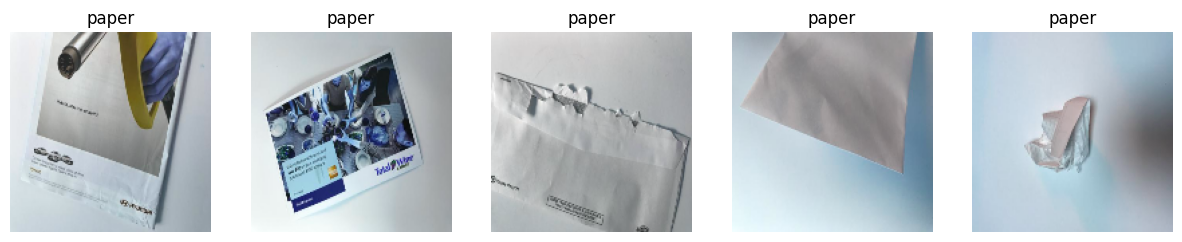

In [24]:
def display_images_of_class(X, y, class_name, number_of_images=5):
    plt.figure(figsize=(15, 10))

    for i in range(number_of_images):
        plt.subplot(1, number_of_images, i + 1)
        plt.imshow(X[y == class_name][i])
        plt.title(class_name)
        plt.axis('off')
    
    plt.show()

display_images_of_class(X_train, y_train, 'paper')